# **PROBLEM STATEMENT**







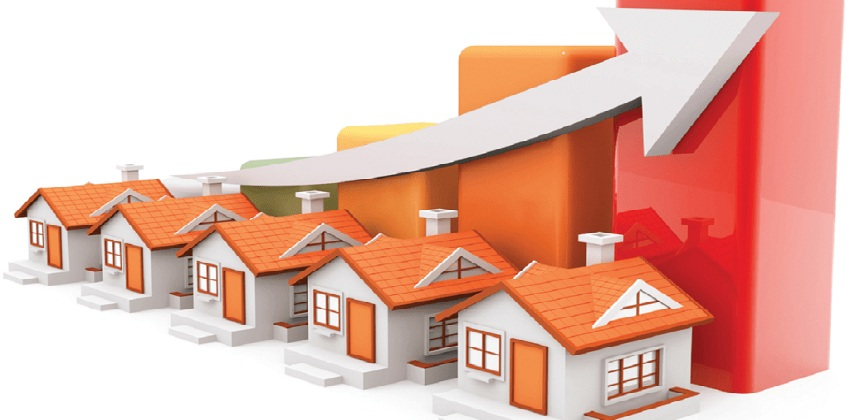

## Chennai House Price Prediction

#### Problem Statement
Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?

#### Minimum Requirements
It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.

```




# Improting Modules

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from mlxtend.plotting import plot_decision_regions

from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn import metrics

pd.pandas.set_option("display.max_columns", None)

import graphviz
from sklearn import tree

# Mount, Load and Summarize Data

In [139]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [140]:
df=pd.read_csv("/content/drive/MyDrive/dsprojest/train-chennai-sale.csv")


In [141]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [142]:
df.shape

(7109, 22)

In [143]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
INT_SQFT,7109.0,1.382073e+03,4.574109e+02,500.0,993.00,1373.0,1744.00,2500.00
DIST_MAINROAD,7109.0,9.960318e+01,5.740311e+01,0.0,50.00,99.0,148.00,200.00
N_BEDROOM,7108.0,1.637029e+00,8.029016e-01,1.0,1.00,1.0,2.00,4.00
N_BATHROOM,7104.0,1.213260e+00,4.096387e-01,1.0,1.00,1.0,1.00,2.00
N_ROOM,7109.0,3.688704e+00,1.019099e+00,2.0,3.00,4.0,4.00,6.00
QS_ROOMS,7109.0,3.517471e+00,8.919724e-01,2.0,2.70,3.5,4.30,5.00
QS_BATHROOM,7109.0,3.507244e+00,8.978337e-01,2.0,2.70,3.5,4.30,5.00
QS_BEDROOM,7109.0,3.485300e+00,8.872664e-01,2.0,2.70,3.5,4.30,5.00
QS_OVERALL,7061.0,3.503254e+00,5.272229e-01,2.0,3.13,3.5,3.89,4.97
REG_FEE,7109.0,3.769383e+05,1.430707e+05,71177.0,272406.00,349486.0,451562.00,983922.00


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [145]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7104    False
7105    False
7106    False
7107    False
7108    False
Length: 7109, dtype: bool

In [146]:
df.duplicated().sum()

0

# Checking and Correcting Spelling Mistakes

In [147]:
area_1=df["AREA"].unique()

In [148]:
df['AREA'] = df['AREA'].replace(['Chrompt','Chrmpet','Chormpet','TNagar','Karapakam','Ana Nagar','Velchery','Ann Nagar','Adyr','KKNagar'],
                     ['Chrompet','Chrompet','Chrompet','T Nagar','Karapakkam','Anna Nagar','Velachery','Anna Nagar','Adyar','KK Nagar'])

In [149]:
df.AREA.value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [150]:
area_1=df["AREA"].unique()
area_1

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [151]:
salecondition=df["SALE_COND"].unique()
salecondition

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [152]:
df["SALE_COND"]=df["SALE_COND"].replace(['Ab Normal','Partiall','PartiaLl','Adj Land' ],['AbNormal','Partial','Partial','AdjLand'])

In [153]:
salecondition=df["SALE_COND"].unique()
salecondition

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [154]:
utility=df["UTILITY_AVAIL"].unique()
utility

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [155]:
df["UTILITY_AVAIL"]=df["UTILITY_AVAIL"].replace(['All Pub','NoSeWa','NoSeWr '],['AllPub','NoSeWr','NoSeWr'])

In [156]:
utility=df["UTILITY_AVAIL"].unique()
utility

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWr'], dtype=object)

In [157]:
street =df["STREET"].unique()
street

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [158]:
df['STREET']= df['STREET'].replace(['Pavd','NoAccess'],['Paved','No Access'])

In [159]:
street =df["STREET"].unique()
street

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [160]:
parking=df['PARK_FACIL'].unique()
parking

array(['Yes', 'No', 'Noo'], dtype=object)

In [161]:
df['PARK_FACIL']=df['PARK_FACIL'].replace(['Noo'],['No'])

In [162]:
parking=df['PARK_FACIL'].unique()
parking

array(['Yes', 'No'], dtype=object)

In [163]:
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [164]:
df['BUILDTYPE']=df['BUILDTYPE'].replace(['Other','Comercial'],['Others','Commercial'])

In [165]:
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

# Remove Unwanted Features

In [166]:
df.drop(["PRT_ID"],axis=1,inplace=True)

In [167]:
df.drop(['REG_FEE'],axis=1,inplace=True)

In [168]:
df.drop(['COMMIS'],axis =1,inplace=True)

In [169]:
df.shape

(7109, 19)

# Find and Replace Null Values

In [170]:
df.isnull().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
dtype: int64

In [171]:
df['N_BEDROOM']=df['N_BEDROOM'].fillna(df['N_BEDROOM'].mode()[0])
df['N_BATHROOM']=df['N_BATHROOM'].fillna(df['N_BATHROOM'].mode()[0])
df['QS_OVERALL']=df['QS_OVERALL'].fillna(df['QS_OVERALL'].mode()[0])


In [172]:
df.isnull().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
SALES_PRICE      0
dtype: int64

In [173]:
df['QS_OVERALL'].mode()

0    3.54
dtype: float64

# Adding New Features

In [174]:
df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'])
df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'])

In [175]:
df['DATE_SALE'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    7109
unique                   2798
top       2009-06-10 00:00:00
freq                       12
first     2004-01-02 00:00:00
last      2015-12-02 00:00:00
Name: DATE_SALE, dtype: object

In [176]:
df['SALE_YEAR']=df['DATE_SALE'].dt.year
df['BUILD_YEAR']=df['DATE_BUILD'].dt.year

In [177]:
df['BUILDING_AGE']=df['SALE_YEAR']-df['BUILD_YEAR']

In [178]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,SALE_YEAR,BUILD_YEAR,BUILDING_AGE
0,Karapakkam,1004,2011-04-05,131,1.0,1.0,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,2011,1967,44
1,Anna Nagar,1986,2006-12-19,26,2.0,1.0,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,2006,1995,11
2,Adyar,909,2012-04-02,70,1.0,1.0,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,2012,1992,20
3,Velachery,1855,2010-03-13,14,3.0,2.0,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,2010,1988,22
4,Karapakkam,1226,2009-05-10,84,1.0,1.0,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,2009,1979,30


In [179]:
df.dtypes

AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM               float64
N_BATHROOM              float64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
SALES_PRICE               int64
SALE_YEAR                 int64
BUILD_YEAR                int64
BUILDING_AGE              int64
dtype: object

In [180]:
df=df.astype({'N_BEDROOM':'object','N_BATHROOM':'object','N_ROOM':'object',})

In [181]:
df.dtypes

AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM                object
N_BATHROOM               object
N_ROOM                   object
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
SALES_PRICE               int64
SALE_YEAR                 int64
BUILD_YEAR                int64
BUILDING_AGE              int64
dtype: object

# Outliers Detection

In [182]:
df.describe()

,INT_SQFT,DIST_MAINROAD,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,SALE_YEAR,BUILD_YEAR,BUILDING_AGE
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03,7109.000000,7109.000000,7109.000000
mean,1382.073006,99.603179,3.517471,3.507244,3.485300,3.503502,1.089491e+07,2009.768181,1985.491912,24.276270
std,457.410902,57.403110,0.891972,0.897834,0.887266,0.525448,3.768603e+06,2.205979,12.648859,12.334164
min,500.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.156875e+06,2004.000000,1949.000000,3.000000
25%,993.000000,50.000000,2.700000,2.700000,2.700000,3.130000,8.272100e+06,2008.000000,1976.000000,14.000000
50%,1373.000000,99.000000,3.500000,3.500000,3.500000,3.510000,1.033505e+07,2010.000000,1986.000000,23.000000
75%,1744.000000,148.000000,4.300000,4.300000,4.300000,3.880000,1.299390e+07,2011.000000,1996.000000,34.000000
max,2500.000000,200.000000,5.000000,5.000000,5.000000,4.970000,2.366734e+07,2015.000000,2010.000000,55.000000


In [183]:
outlier=[]
mean,std=1382.073006,457.410902	
for i in df['INT_SQFT']:
  x = (i-mean)/std
  if x<-3 or x>3:
    outlier.append(i)
print(len(outlier))


0


No outlier found in INT_SQFT(Area)





In [184]:
outlier=[]
mean,std=99.603179,57.403110
for i in df['DIST_MAINROAD']:
  x = (i-mean)/std
  if x<-3 or x>3:
    outlier.append(i)
print(len(outlier))


0


Distance from main road to building also had no outliers

In [185]:
outlier=[]
mean,std=7.109000e+03,1.089491e+07
for i in df['SALES_PRICE']:
  x = (i-mean)/std
  if x<-3 or x>3:
    outlier.append(i)
print(len(outlier))

0


The target feature also not having any outliers

In [186]:
df=df.drop(['DATE_SALE','DATE_BUILD'],axis=1)
df.columns


Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'SALE_YEAR', 'BUILD_YEAR', 'BUILDING_AGE'],
      dtype='object')



# Exploartory Data Analysis

Checking Skewness

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

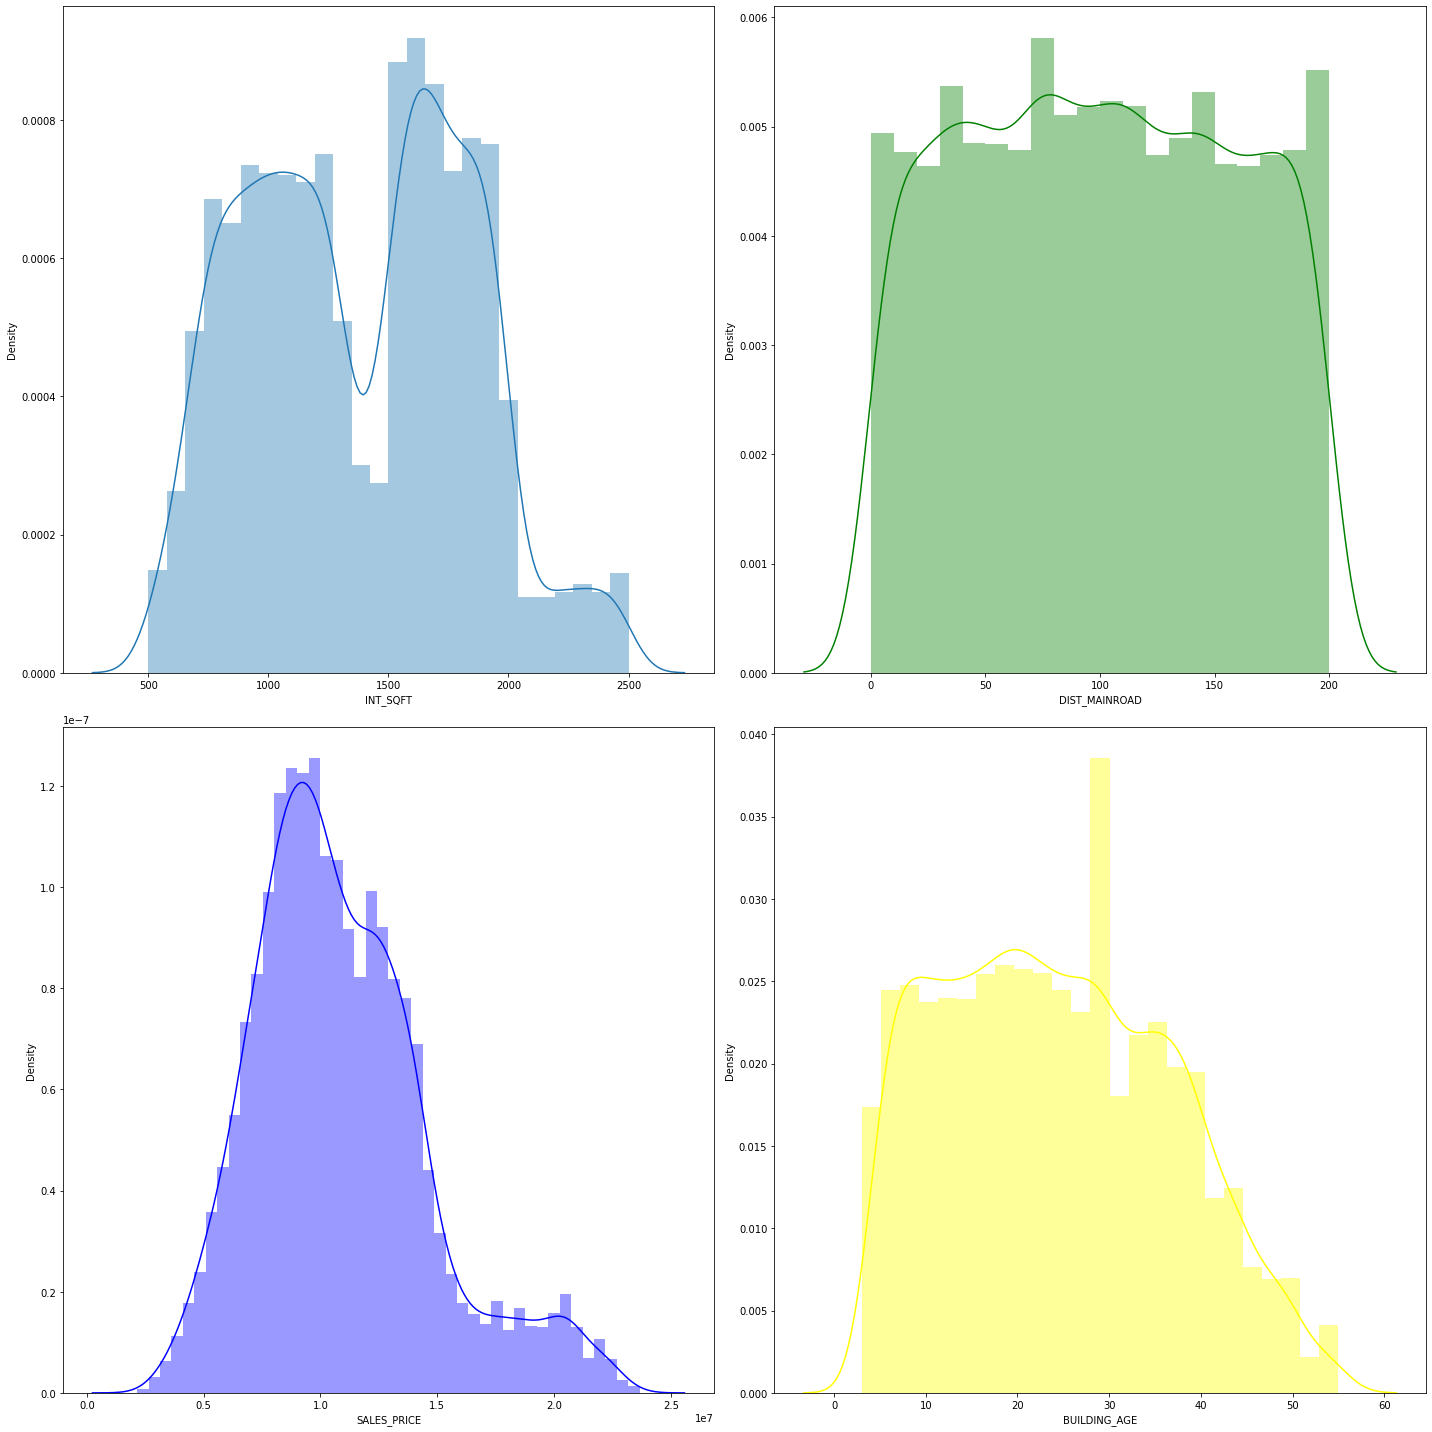

In [187]:
fig,loc=plt.subplots(2,2)
fig.set_figheight(20)
fig.set_figwidth(20)
sns.distplot(df.INT_SQFT,ax=loc[0,0])
sns.distplot(df.DIST_MAINROAD, color='green',ax=loc[0,1])
sns.distplot(df.SALES_PRICE,color = 'blue',ax=loc[1,0])
sns.distplot(df.BUILDING_AGE,color='yellow',ax=loc[1,1])
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

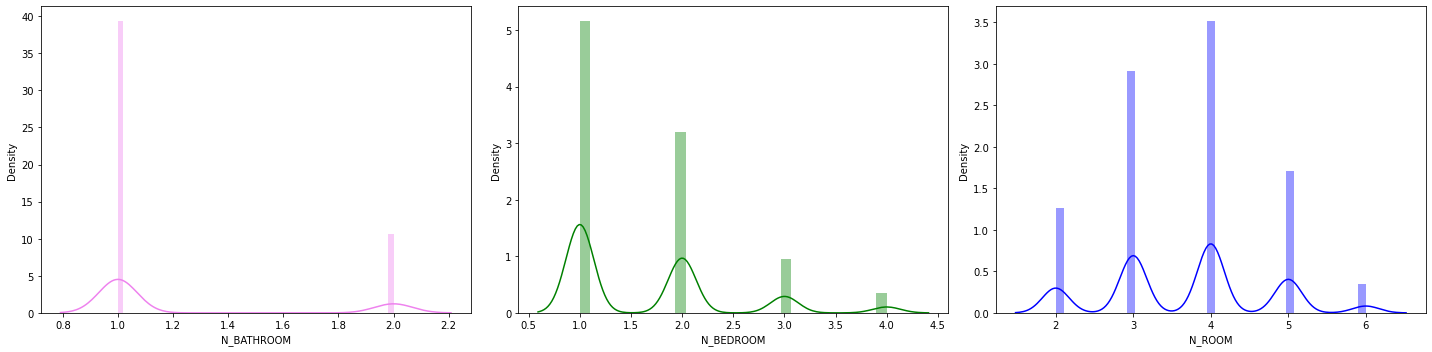

In [188]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.distplot(df.N_BATHROOM,color='violet')
plt.subplot(1,3,2)
sns.distplot(df.N_BEDROOM, color='green')
plt.subplot(1,3,3)
sns.distplot(df.N_ROOM,color = 'blue')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

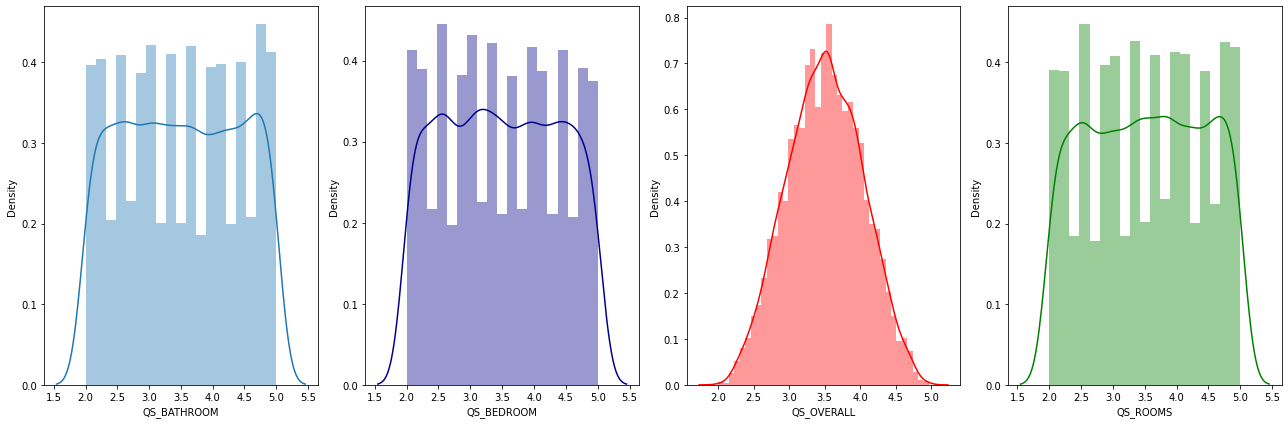

In [189]:
plt.figure(figsize=(18,6))
plt.subplot(1,4,1)
sns.distplot(df.QS_BATHROOM)
plt.subplot(1,4,2)
sns.distplot(df.QS_BEDROOM,color = 'darkblue')
plt.subplot(1,4,3)
sns.distplot(df.QS_OVERALL,color = 'red')
plt.subplot(1,4,4)
sns.distplot(df.QS_ROOMS,color = 'green')
plt.tight_layout()
plt.show()

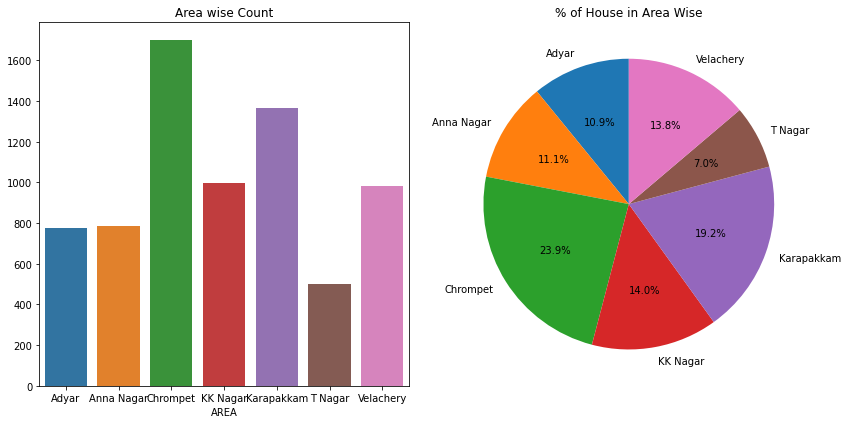

In [190]:
a=[]
A=df['AREA'].groupby(df['AREA']).count()
A_index=A.index
A_values=A.values
total_data=sum(A)
for i in A:
  c=(i/total_data)*100
  a.append(c)
area_name=A.index
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)

#sns.barplot(df.AREA,df.SALES_PRICE,order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'],ax=pos[0,0])
sns.barplot(x=A_index,y=A_values,data=df)#,order=df.sort_values(A_values).A_index)
#sns.barplot(x=A.index,y=A.values,order=df.groupby(A.index)[A.values].mean().sort_values(A.values)[A.index])
plt.title('Area wise Count')

plt.subplot(1,2,2)
plt.pie(a,labels=area_name,startangle=90,autopct='%1.1f%%')
plt.title('% of House in Area Wise')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

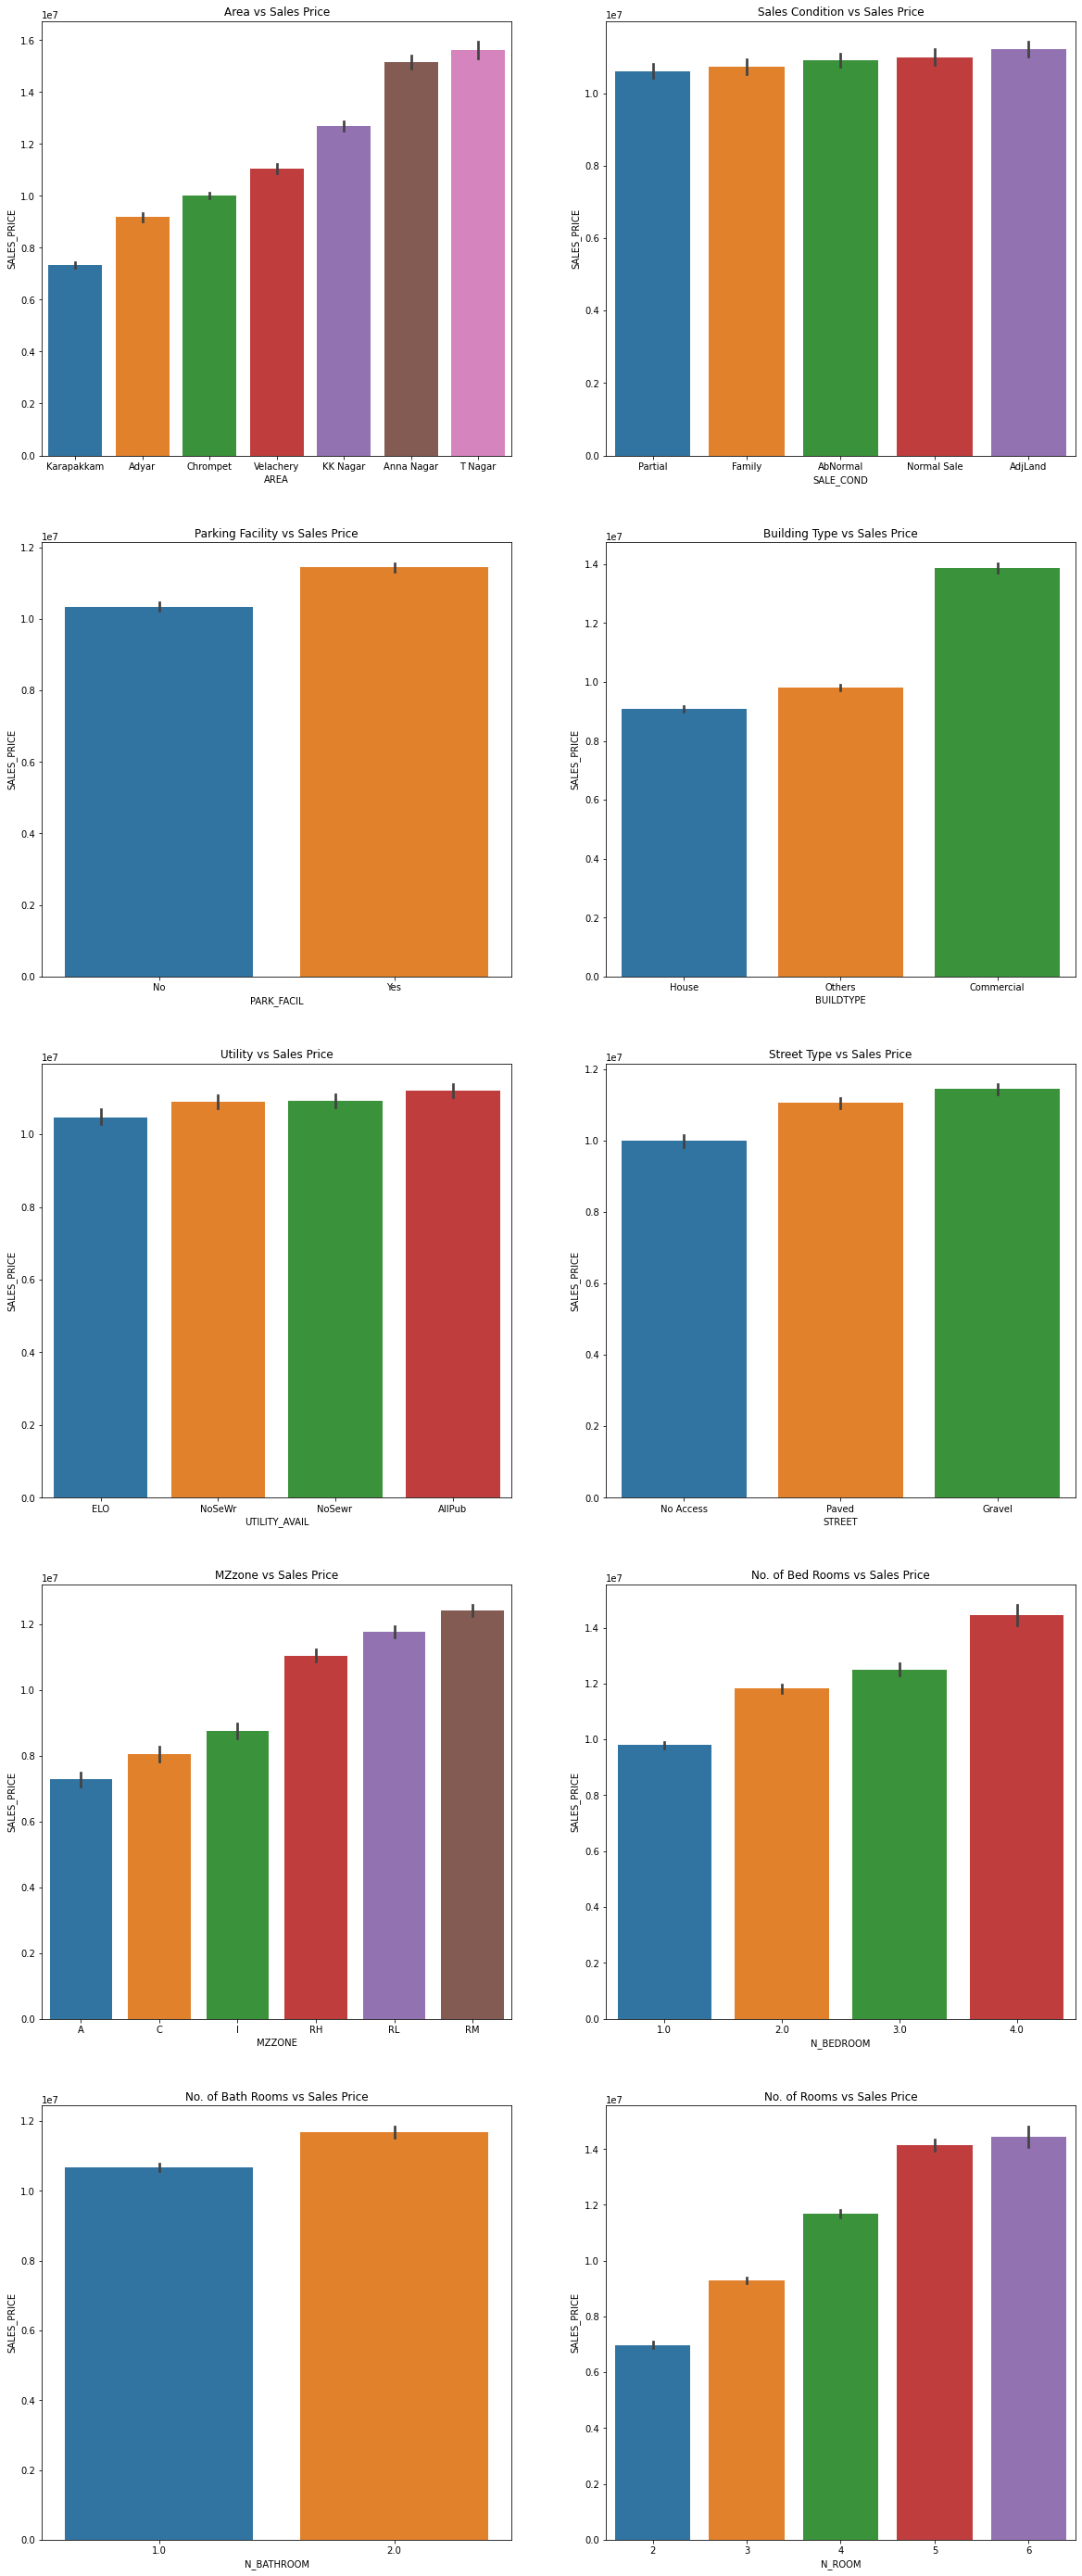

In [191]:
fig,pos =plt.subplots(5,2)
fig.set_figheight(50)
fig.set_figwidth(20)
sns.barplot(df.AREA,df.SALES_PRICE,order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'],ax=pos[0,0])
pos[0,0].set_title("Area vs Sales Price")
sns.barplot(df.SALE_COND,df.SALES_PRICE,order=df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'],ax=pos[0,1])
pos[0,1].set_title("Sales Condition vs Sales Price")
sns.barplot(df.PARK_FACIL,df.SALES_PRICE,order=df.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'],ax=pos[1,0])
pos[1,0].set_title("Parking Facility vs Sales Price")
sns.barplot(df.BUILDTYPE,df.SALES_PRICE,order=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'],ax=pos[1,1])
pos[1,1].set_title("Building Type vs Sales Price")
sns.barplot(df.UTILITY_AVAIL,df.SALES_PRICE,order=df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'],ax=pos[2,0])
pos[2,0].set_title("Utility vs Sales Price")
sns.barplot(df.STREET,df.SALES_PRICE,order=df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'],ax=pos[2,1])
pos[2,1].set_title("Street Type vs Sales Price")
sns.barplot(df.MZZONE,df.SALES_PRICE,order=df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'],ax=pos[3,0])
pos[3,0].set_title("MZzone vs Sales Price")
sns.barplot(df.N_BEDROOM,df.SALES_PRICE,order=df.groupby('N_BEDROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_BEDROOM'],ax=pos[3,1])
pos[3,1].set_title("No. of Bed Rooms vs Sales Price")
sns.barplot(df.N_BATHROOM,df.SALES_PRICE,order=df.groupby('N_BATHROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_BATHROOM'],ax=pos[4,0])
pos[4,0].set_title("No. of Bath Rooms vs Sales Price")
sns.barplot(df.N_ROOM,df.SALES_PRICE,order=df.groupby('N_ROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_ROOM'],ax=pos[4,1])
pos[4,1].set_title("No. of Rooms vs Sales Price")
plt.show()


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DIST_MAINROAD  7109 non-null   int64  
 3   N_BEDROOM      7109 non-null   object 
 4   N_BATHROOM     7109 non-null   object 
 5   N_ROOM         7109 non-null   object 
 6   SALE_COND      7109 non-null   object 
 7   PARK_FACIL     7109 non-null   object 
 8   BUILDTYPE      7109 non-null   object 
 9   UTILITY_AVAIL  7109 non-null   object 
 10  STREET         7109 non-null   object 
 11  MZZONE         7109 non-null   object 
 12  QS_ROOMS       7109 non-null   float64
 13  QS_BATHROOM    7109 non-null   float64
 14  QS_BEDROOM     7109 non-null   float64
 15  QS_OVERALL     7109 non-null   float64
 16  SALES_PRICE    7109 non-null   int64  
 17  SALE_YEAR      7109 non-null   int64  
 18  BUILD_YE

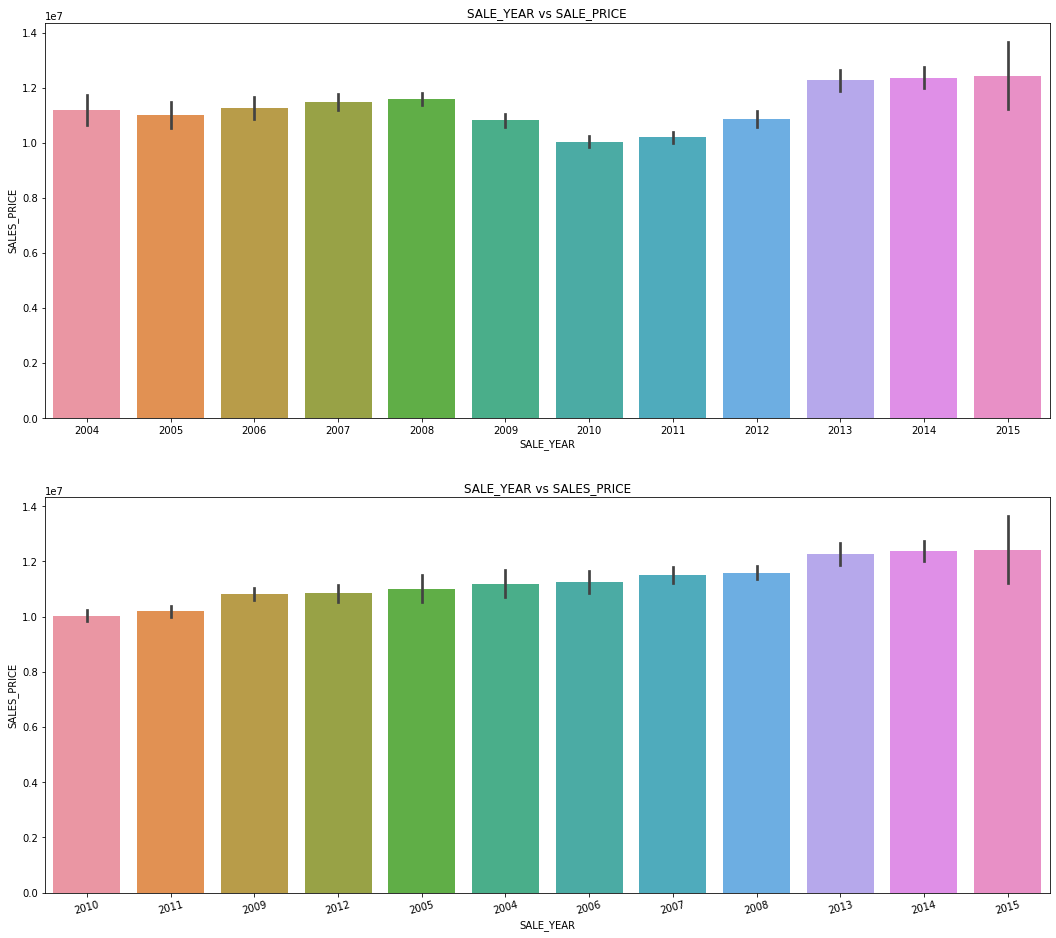

In [193]:
from pandas.io.formats.style_render import DataFrame
plt.figure(figsize=(18,16))
plt.subplot(2,1,1)
sns.barplot(x='SALE_YEAR',y='SALES_PRICE',data=df)
plt.title('SALE_YEAR vs SALE_PRICE')

plt.subplot(2,1,2)
sns.barplot(x='SALE_YEAR',y='SALES_PRICE',data=df,order=df.groupby('SALE_YEAR')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_YEAR'])
plt.xticks(rotation=15)
plt.title('SALE_YEAR vs SALES_PRICE')
plt.show()

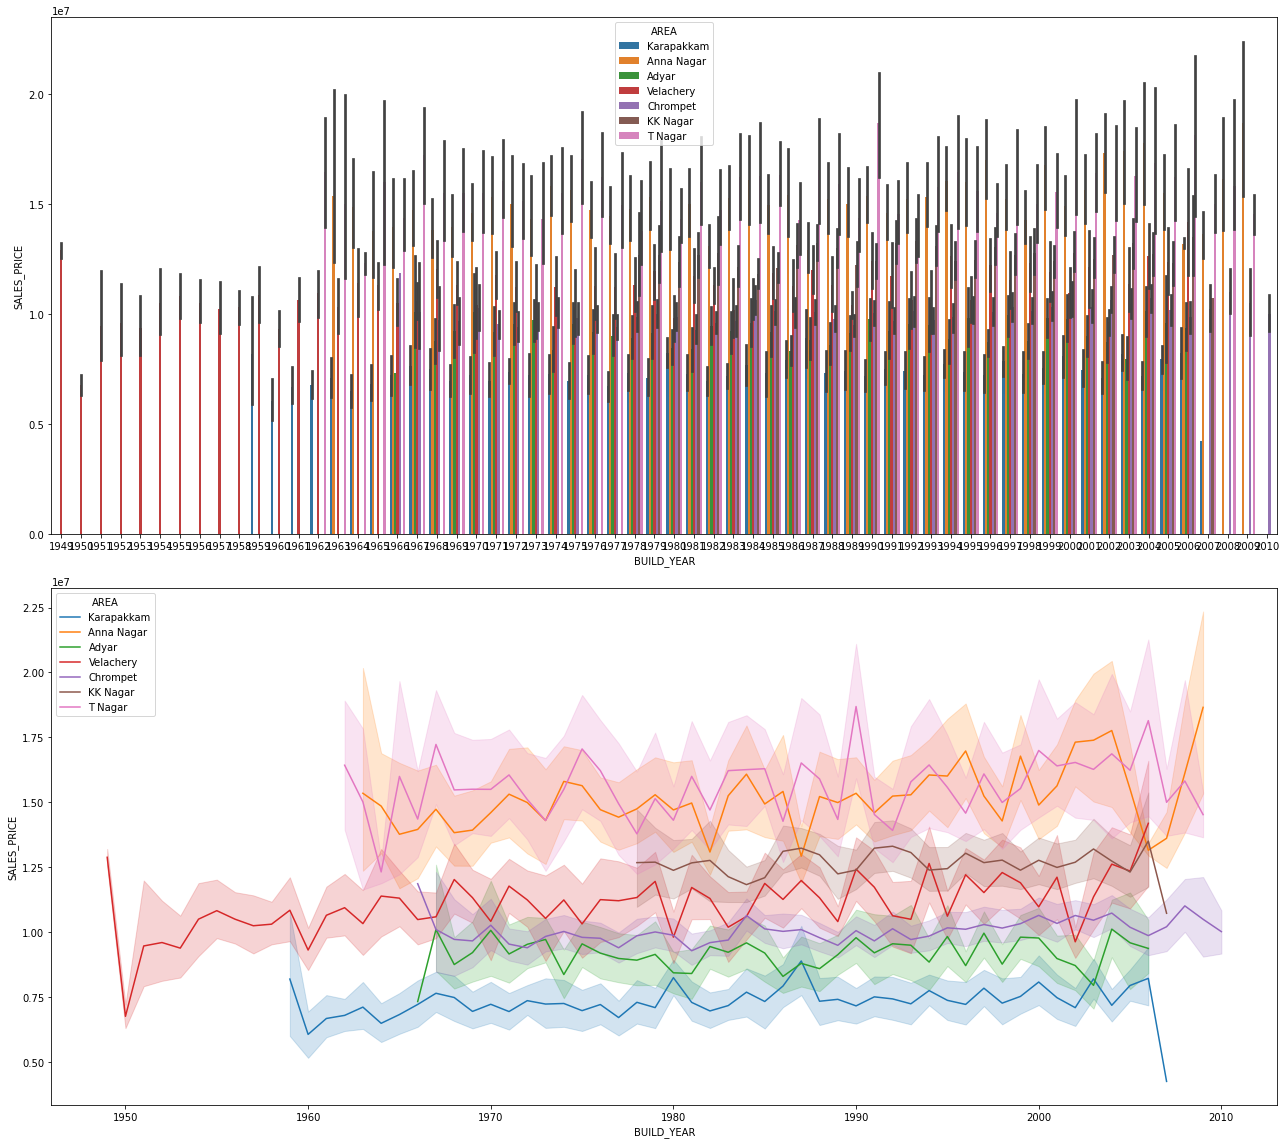

In [194]:
plt.figure(figsize=(18,16))

plt.subplot(2,1,1)
sns.barplot(x = "BUILD_YEAR", y = df["SALES_PRICE"].values, data = df,hue='AREA')
plt.ylabel('SALES_PRICE')

plt.subplot(2,1,2)
sns.lineplot(x = "BUILD_YEAR", y = df["SALES_PRICE"].values, data = df,hue='AREA')
plt.ylabel('SALES_PRICE')
plt.tight_layout()
plt.show()

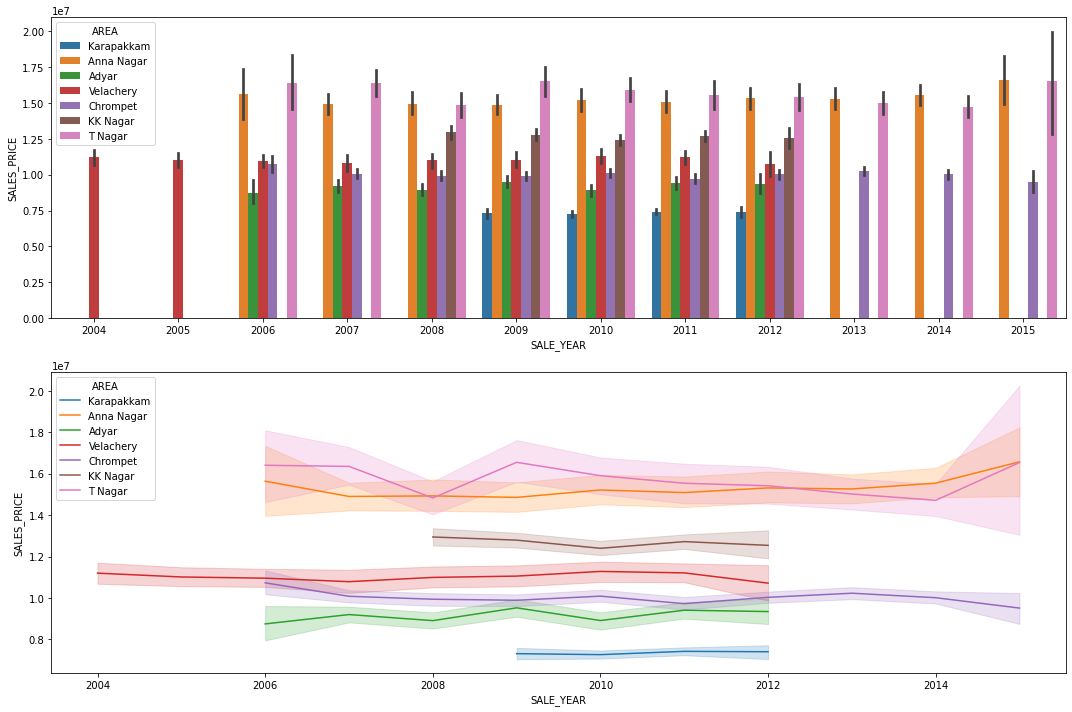

In [195]:
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
sns.barplot(x = "SALE_YEAR", y = df["SALES_PRICE"].values, data = df,hue='AREA')
plt.ylabel('SALES_PRICE')

plt.subplot(2,1,2)
sns.lineplot(x = "SALE_YEAR", y = df["SALES_PRICE"].values, data = df,hue='AREA')
plt.ylabel('SALES_PRICE')

plt.tight_layout()
plt.show()

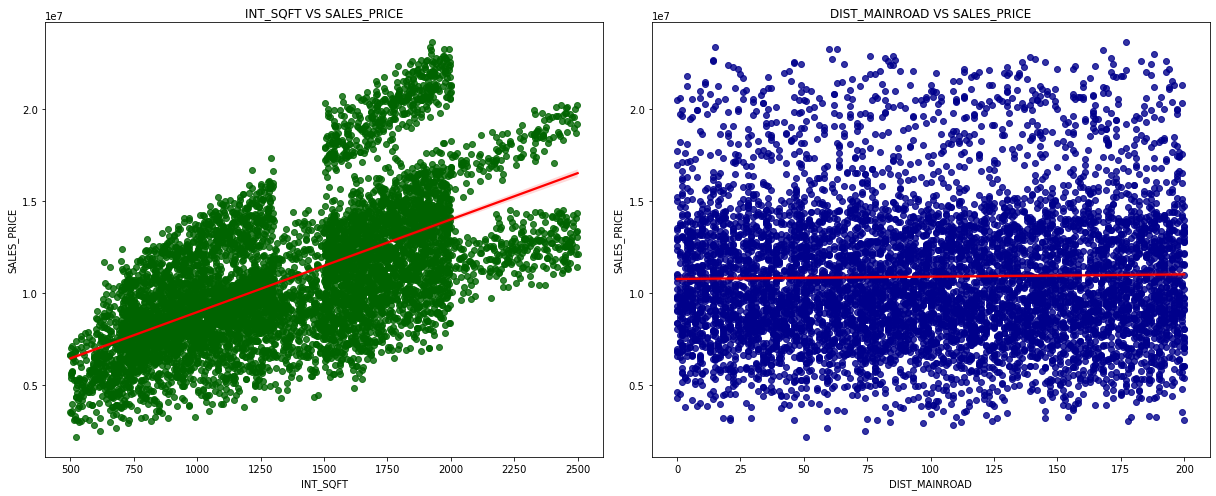


              INT_SQFT  SALES_PRICE
INT_SQFT     1.000000     0.612125
SALES_PRICE  0.612125     1.000000

                DIST_MAINROAD  SALES_PRICE
DIST_MAINROAD       1.000000     0.018783
SALES_PRICE         0.018783     1.000000


In [196]:
plt.figure(figsize=(17,7))

plt.subplot(121)
sns.regplot(x=df['INT_SQFT'],y=df['SALES_PRICE'],scatter_kws={'color':'darkgreen'},line_kws={'color':'red'})
plt.title('INT_SQFT VS SALES_PRICE')

plt.subplot(122)
sns.regplot(x=df['DIST_MAINROAD'],y=df['SALES_PRICE'],scatter_kws={'color':'darkblue'},line_kws={'color':'red'})
plt.title('DIST_MAINROAD VS SALES_PRICE')

plt.tight_layout()
plt.show()

print('\n',df[['INT_SQFT','SALES_PRICE']].corr())
print('\n',df[['DIST_MAINROAD','SALES_PRICE']].corr())

In [197]:
df=df.drop(['DIST_MAINROAD'],axis=1)

In [198]:
df.head()


,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,SALE_YEAR,BUILD_YEAR,BUILDING_AGE
0,Karapakkam,1004,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,2011,1967,44
1,Anna Nagar,1986,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,2006,1995,11
2,Adyar,909,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,2012,1992,20
3,Velachery,1855,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,2010,1988,22
4,Karapakkam,1226,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,2009,1979,30


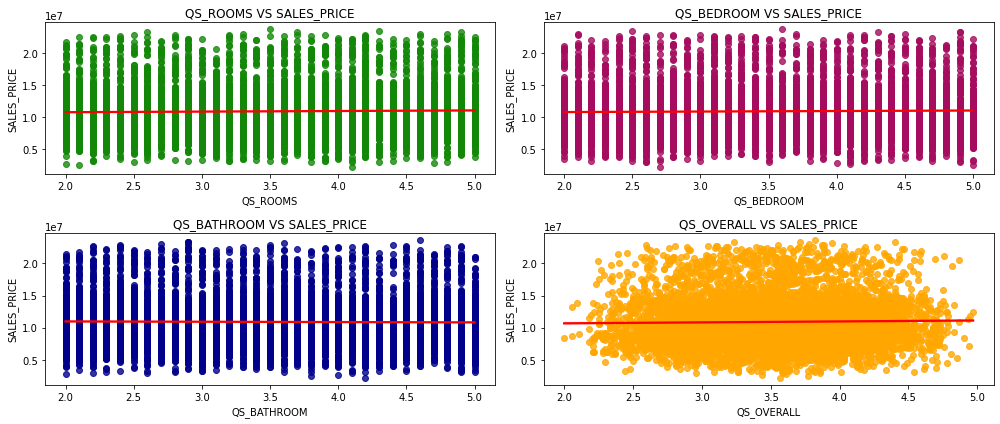


              QS_ROOMS  SALES_PRICE
QS_ROOMS     1.000000     0.021967
SALES_PRICE  0.021967     1.000000

              QS_BEDROOM  SALES_PRICE
QS_BEDROOM     1.000000     0.018804
SALES_PRICE    0.018804     1.000000

              QS_BATHROOM  SALES_PRICE
QS_BATHROOM     1.000000    -0.011377
SALES_PRICE    -0.011377     1.000000

              QS_OVERALL  SALES_PRICE
QS_OVERALL     1.000000     0.020604
SALES_PRICE    0.020604     1.000000


In [199]:
plt.figure(figsize=(14,6))

plt.subplot(221)
sns.regplot(x=df['QS_ROOMS'],y=df['SALES_PRICE'],scatter_kws={'color':'#138808'},line_kws={'color':'red'})
plt.title('QS_ROOMS VS SALES_PRICE')

plt.subplot(222)
sns.regplot(x=df['QS_BEDROOM'],y=df['SALES_PRICE'],scatter_kws={'color':'#A50B5E'},line_kws={'color':'red'})
plt.title('QS_BEDROOM VS SALES_PRICE')

plt.subplot(223)
sns.regplot(x=df['QS_BATHROOM'],y=df['SALES_PRICE'],scatter_kws={'color':'darkblue'},line_kws={'color':'red'})
plt.title('QS_BATHROOM VS SALES_PRICE')

plt.subplot(224)
sns.regplot(x=df['QS_OVERALL'],y=df['SALES_PRICE'],scatter_kws={'color':'#FFA700'},line_kws={'color':'red'})
plt.title('QS_OVERALL VS SALES_PRICE')

plt.tight_layout()
plt.show()

print('\n',df[['QS_ROOMS','SALES_PRICE']].corr())
print('\n',df[['QS_BEDROOM','SALES_PRICE']].corr())
print('\n',df[['QS_BATHROOM','SALES_PRICE']].corr())
print('\n',df[['QS_OVERALL','SALES_PRICE']].corr())

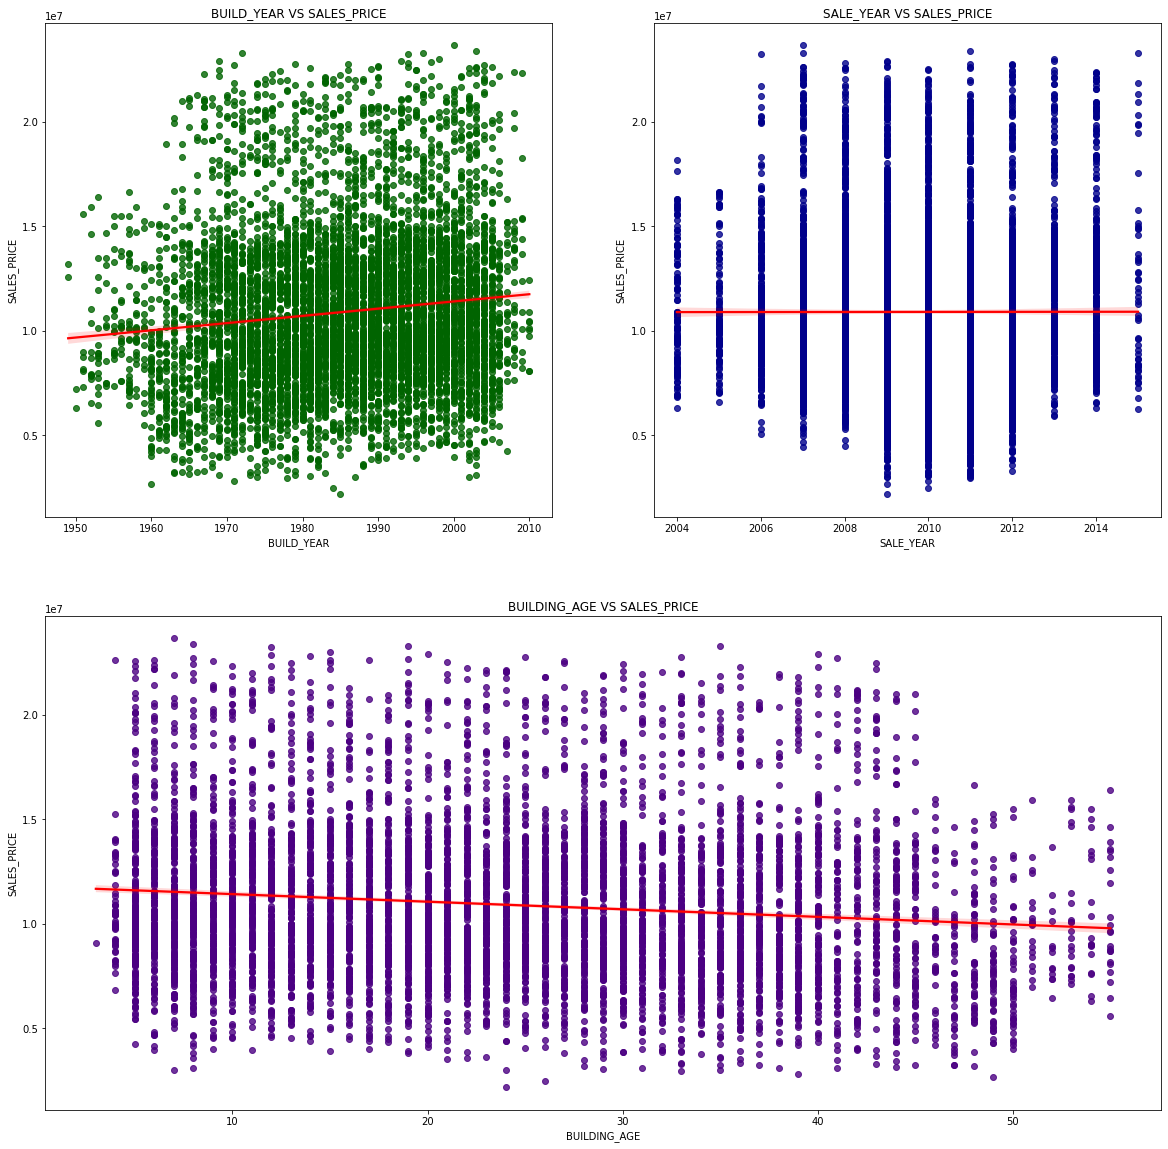


              BUILD_YEAR  SALES_PRICE
BUILD_YEAR     1.000000     0.116043
SALES_PRICE    0.116043     1.000000

              SALE_YEAR  SALES_PRICE
SALE_YEAR     1.000000     0.000906
SALES_PRICE   0.000906     1.000000
              BUILDING_AGE  SALES_PRICE
BUILDING_AGE      1.000000    -0.118842
SALES_PRICE      -0.118842     1.000000


In [200]:
plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
sns.regplot(x=df['BUILD_YEAR'],y=df['SALES_PRICE'],scatter_kws={'color':'darkgreen'},line_kws={'color':'red'})
plt.title('BUILD_YEAR VS SALES_PRICE')

plt.subplot(2,2,2)
sns.regplot(x=df['SALE_YEAR'],y=df['SALES_PRICE'],scatter_kws={'color':'darkblue'},line_kws={'color':'red'})
plt.title('SALE_YEAR VS SALES_PRICE')

plt.subplot(2,2,(3,4))
sns.regplot(x=df['BUILDING_AGE'],y=df['SALES_PRICE'],scatter_kws={'color':'indigo'},line_kws={'color':'red'})
plt.title('BUILDING_AGE VS SALES_PRICE')

plt.show()

print('\n',df[['BUILD_YEAR','SALES_PRICE']].corr())
print('\n',df[['SALE_YEAR','SALES_PRICE']].corr())
print(df[['BUILDING_AGE','SALES_PRICE']].corr())

In [201]:
df=df.drop(['QS_ROOMS', 'QS_BEDROOM', 'QS_BATHROOM','QS_OVERALL','SALE_YEAR'],axis=1)

In [202]:
#Commercial
buildtype_fltr_C = df['BUILDTYPE']=='Commercial'
commercial=df.loc[buildtype_fltr_C]
min = commercial['SALES_PRICE'].min()
median = commercial['SALES_PRICE'].median()
max = commercial['SALES_PRICE'].max()
index=['Minimun_Sales_Price','Mean_Sales_Price','Median_Sales_Price','Maximum_Sales_Price']
comm = pd.DataFrame([min,mean,median,max],columns=['Commercial'],index=index)

# #House
buildtype_fltr_H = df['BUILDTYPE']=='House'
House=df.loc[buildtype_fltr_H]
min = House['SALES_PRICE'].min()
mean= House['SALES_PRICE'].mean()
median = House['SALES_PRICE'].median()
max = House['SALES_PRICE'].max()
house = pd.DataFrame([min,mean,median,max],columns=['House'],index=index)

# #Others
buildtype_fltr_O = df['BUILDTYPE']=='Others'
Others=df.loc[buildtype_fltr_O]
min = Others['SALES_PRICE'].min()
mean= Others['SALES_PRICE'].mean()
median = Others['SALES_PRICE'].median()
max = Others['SALES_PRICE'].max()
others = pd.DataFrame([min,mean,median,max],columns=['Others'],index=index)

Buildtype_mmm = pd.concat([comm,house,others],axis=1)
Buildtype_mmm = pd.DataFrame(Buildtype_mmm.T)
Buildtype_mmm["Build_type"]=["Commercial","House","Others"]


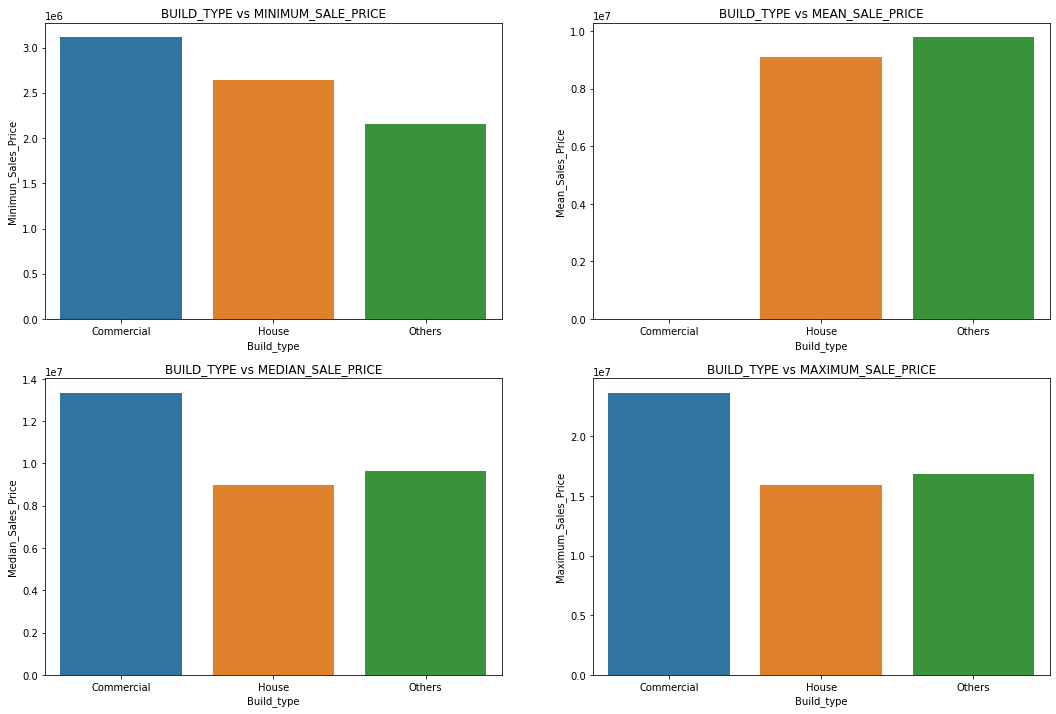

In [203]:
plt.figure(figsize=(18,12))
plt.subplot(221)
sns.barplot(x="Build_type",y="Minimun_Sales_Price",data=Buildtype_mmm)
plt.title('BUILD_TYPE vs MINIMUM_SALE_PRICE')
plt.subplot(222)
sns.barplot(x="Build_type",y="Mean_Sales_Price",data=Buildtype_mmm)
plt.title('BUILD_TYPE vs MEAN_SALE_PRICE')
plt.subplot(223)
sns.barplot(x="Build_type",y="Median_Sales_Price",data=Buildtype_mmm)
plt.title('BUILD_TYPE vs MEDIAN_SALE_PRICE')
plt.subplot(224)
sns.barplot(x="Build_type",y="Maximum_Sales_Price",data=Buildtype_mmm)
plt.title('BUILD_TYPE vs MAXIMUM_SALE_PRICE')
plt.show()

In [204]:
mean=df.groupby('AREA')['SALES_PRICE'].mean()
mean_=mean.values
max=df.groupby('AREA')['SALES_PRICE'].max()
max_=max.values
min=df.groupby('AREA')['SALES_PRICE'].min()
min_=min.values
median=df.groupby('AREA')['SALES_PRICE'].median()
median_=min.values
Area_mmm=pd.DataFrame([min_,mean_,median_,max_],columns=mean.index,index=['Minimun_Sales_Price','Average_Sales_Price','Median_Sales_Price','Maximum_Sales_Price']).T
Area_mmm["AREA"]=["Adyar","Anna Nagar","Chrompet","KK Nagar","Karapakam","T Nagar","Velachery"]

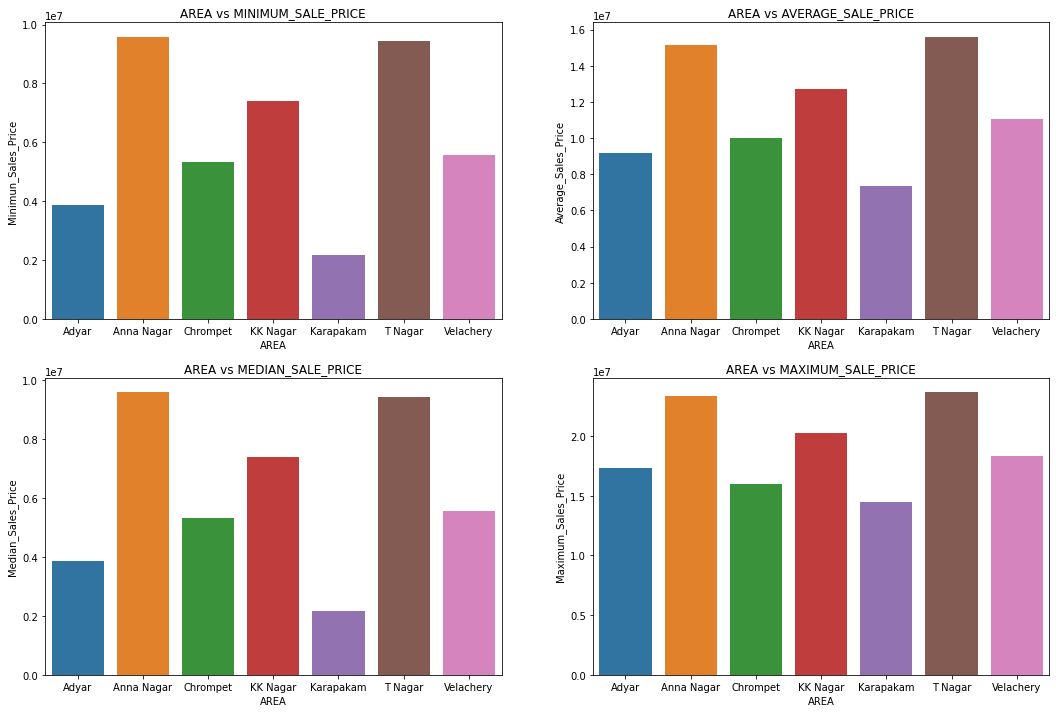

In [205]:
plt.figure(figsize=(18,12))
plt.subplot(221)
sns.barplot(x='AREA',y='Minimun_Sales_Price',data=Area_mmm)
plt.title('AREA vs MINIMUM_SALE_PRICE')
plt.subplot(222)
sns.barplot(x='AREA',y='Average_Sales_Price',data=Area_mmm)
plt.title('AREA vs AVERAGE_SALE_PRICE')
plt.subplot(223)
sns.barplot(x='AREA',y='Median_Sales_Price',data=Area_mmm)
plt.title('AREA vs MEDIAN_SALE_PRICE')
plt.subplot(224)
sns.barplot(x='AREA',y='Maximum_Sales_Price',data=Area_mmm)
plt.title('AREA vs MAXIMUM_SALE_PRICE')
plt.show()

In [206]:
mean=pd.DataFrame(df[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].mean())
median=pd.DataFrame(df[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].median())
max=pd.DataFrame(df[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].max())
min=pd.DataFrame(df[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].min())

mmm_df = pd.concat([min,mean['SALES_PRICE'].rename('Average'),median['SALES_PRICE'].rename('Median'),max['SALES_PRICE'].rename('Maximum')],axis=1)
column =['Minimum','Average','Median','Maximum']
mmm__df = pd.DataFrame(mmm_df)
mmm__df.rename(columns={'SALES_PRICE':'Minimum'},inplace=True)
mmm__df['BUILDTYPE']=['Commercial','Commercial','Commercial','Commercial','Commercial','Commercial','Commercial',
                      'House','House','House','House','House','House','House',
                      'Others','Others','Others','Others','Others','Others','Others']
mmm__df['AREA']=["Adyar","Anna Nagar","Chrompet","KK Nagar","Karapakam","T Nagar","Velachery",
                 "Adyar","Anna Nagar","Chrompet","KK Nagar","Karapakam","T Nagar","Velachery",
                 "Adyar","Anna Nagar","Chrompet","KK Nagar","Karapakam","T Nagar","Velachery"]


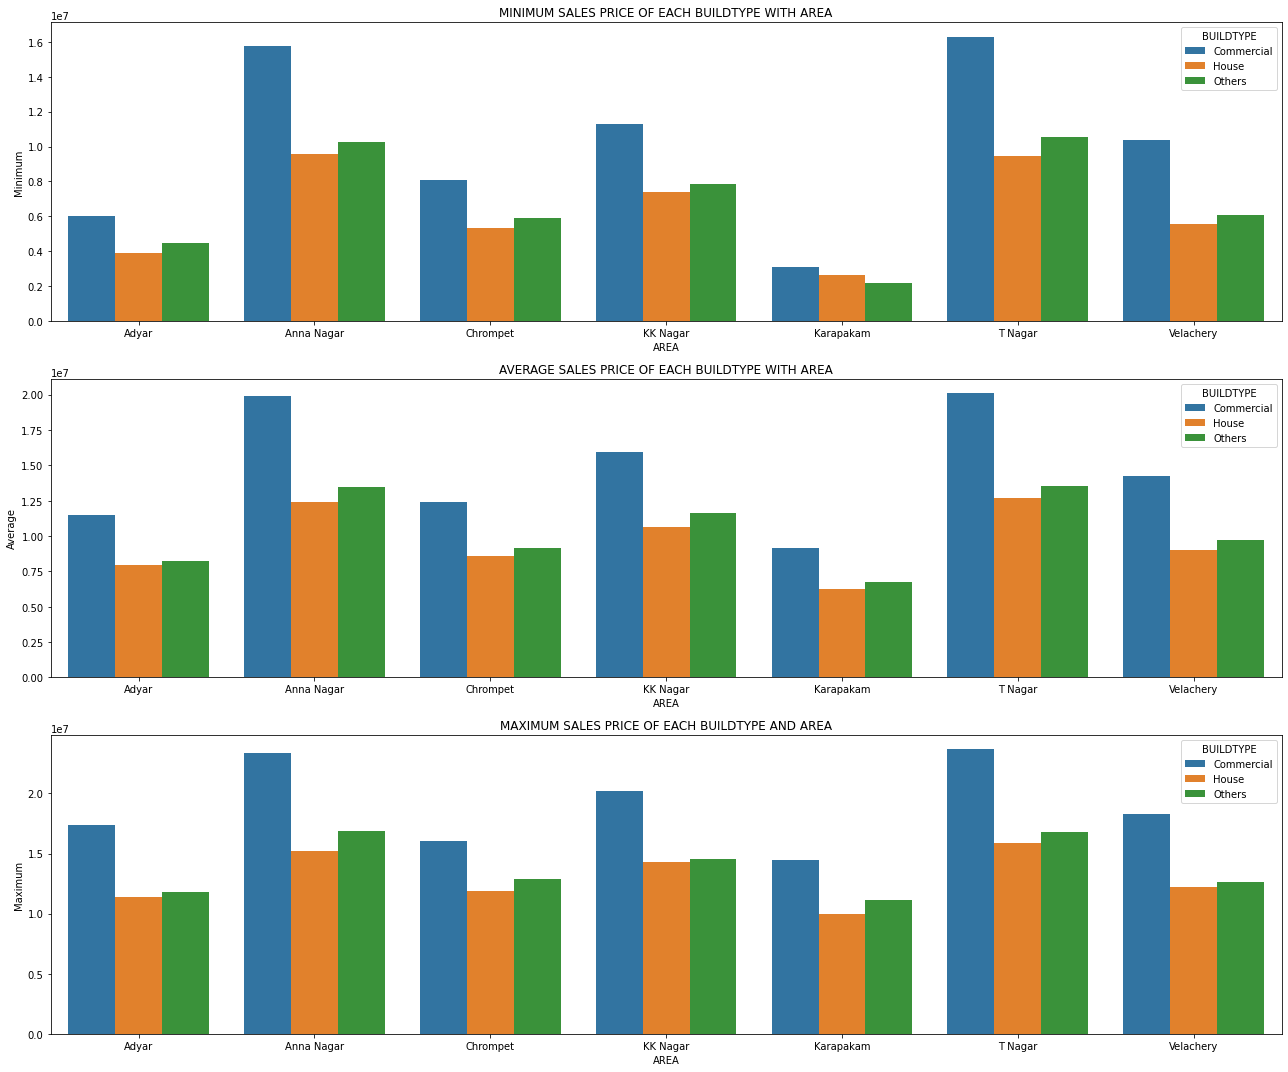

In [207]:
plt.figure(figsize=(18,15))

plt.subplot(311)
sns.barplot(x='AREA',y='Minimum',data=mmm__df,hue='BUILDTYPE')
plt.title('MINIMUM SALES PRICE OF EACH BUILDTYPE WITH AREA')

plt.subplot(312)
sns.barplot(x='AREA',y='Average',data=mmm__df,hue='BUILDTYPE')
plt.title('AVERAGE SALES PRICE OF EACH BUILDTYPE WITH AREA')

plt.subplot(313)
sns.barplot(x='AREA',y='Maximum',data=mmm__df,hue='BUILDTYPE')
plt.title('MAXIMUM SALES PRICE OF EACH BUILDTYPE AND AREA')

plt.tight_layout()
plt.show()

# Encoding the Features

In [208]:
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'SALES_PRICE', 'BUILD_YEAR', 'BUILDING_AGE'],
      dtype='object')

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   AREA           7109 non-null   object
 1   INT_SQFT       7109 non-null   int64 
 2   N_BEDROOM      7109 non-null   object
 3   N_BATHROOM     7109 non-null   object
 4   N_ROOM         7109 non-null   object
 5   SALE_COND      7109 non-null   object
 6   PARK_FACIL     7109 non-null   object
 7   BUILDTYPE      7109 non-null   object
 8   UTILITY_AVAIL  7109 non-null   object
 9   STREET         7109 non-null   object
 10  MZZONE         7109 non-null   object
 11  SALES_PRICE    7109 non-null   int64 
 12  BUILD_YEAR     7109 non-null   int64 
 13  BUILDING_AGE   7109 non-null   int64 
dtypes: int64(4), object(10)
memory usage: 777.7+ KB


In [210]:
# Get  columns whose data type is object i.e. string
filteredColumns = df.dtypes[df.dtypes == np.object]
# list of columns whose data type is object i.e. string
listOfColumnNames = list(filteredColumns.index)
listOfColumnNames

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


['AREA',
 'N_BEDROOM',
 'N_BATHROOM',
 'N_ROOM',
 'SALE_COND',
 'PARK_FACIL',
 'BUILDTYPE',
 'UTILITY_AVAIL',
 'STREET',
 'MZZONE']

In [211]:
df['N_BEDROOM'].astype(int)

0       1
1       2
2       1
3       3
4       1
       ..
7104    1
7105    3
7106    2
7107    1
7108    3
Name: N_BEDROOM, Length: 7109, dtype: int64

In [212]:
df['N_BATHROOM'].astype(int)
df['N_ROOM'].astype(int)

0       3
1       5
2       3
3       5
4       3
       ..
7104    2
7105    5
7106    4
7107    2
7108    5
Name: N_ROOM, Length: 7109, dtype: int64

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   AREA           7109 non-null   object
 1   INT_SQFT       7109 non-null   int64 
 2   N_BEDROOM      7109 non-null   object
 3   N_BATHROOM     7109 non-null   object
 4   N_ROOM         7109 non-null   object
 5   SALE_COND      7109 non-null   object
 6   PARK_FACIL     7109 non-null   object
 7   BUILDTYPE      7109 non-null   object
 8   UTILITY_AVAIL  7109 non-null   object
 9   STREET         7109 non-null   object
 10  MZZONE         7109 non-null   object
 11  SALES_PRICE    7109 non-null   int64 
 12  BUILD_YEAR     7109 non-null   int64 
 13  BUILDING_AGE   7109 non-null   int64 
dtypes: int64(4), object(10)
memory usage: 777.7+ KB


In [214]:
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [215]:
df['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [216]:
df['PARK_FACIL'].unique()

array(['Yes', 'No'], dtype=object)

In [217]:
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [218]:
df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWr'], dtype=object)

In [219]:
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [220]:
df['MZZONE'].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [221]:
df['AREA']=df['AREA'].map({'Karapakkam':1, 'Anna Nagar':2, 'Adyar':3, 'Velachery':4, 'Chrompet':5,
                           'KK Nagar':6, 'T Nagar':7})
df['SALE_COND']=df['SALE_COND'].map({'AbNormal':1, 'Family':2, 'Partial':3, 'AdjLand':4, 'Normal Sale':5})
df['PARK_FACIL']=df['PARK_FACIL'].map({'Yes':1, 'No':0})
df['BUILDTYPE']=df['BUILDTYPE'].map({'Commercial':1, 'Others':2, 'House':3})
df['UTILITY_AVAIL']=df['UTILITY_AVAIL'].map({'AllPub':1, 'ELO':2, 'NoSewr ':3, 'NoSeWr':4})
df['STREET']=df['STREET'].map({'Paved':1, 'Gravel':2, 'No Access':3})
df['MZZONE']=df['MZZONE'].map({'A':1, 'RH':2, 'RL':3, 'I':4, 'C':5, 'RM':6})
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,BUILD_YEAR,BUILDING_AGE
0,1,1004,1.0,1.0,3,1,1,1,1,1,1,7600000,1967,44
1,2,1986,2.0,1.0,5,1,0,1,1,2,2,21717770,1995,11
2,3,909,1.0,1.0,3,1,1,1,2,2,3,13159200,1992,20
3,4,1855,3.0,2.0,5,2,0,2,3,1,4,9630290,1988,22
4,1,1226,1.0,1.0,3,1,1,2,1,2,5,7406250,1979,30


# Target and Features Setting

In [222]:
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'SALES_PRICE', 'BUILD_YEAR', 'BUILDING_AGE'],
      dtype='object')

In [223]:
X=df[['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'BUILD_YEAR', 'BUILDING_AGE']].values

In [224]:
Y=df['SALES_PRICE'].values

In [225]:
# Splitting 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

In [226]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# Liner Reegression

In [227]:
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [228]:
# Test
y_test=Y_test
y_pred=(lr.predict(X_test))
df1=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df1

,Actual,Predicted
0,15244800,1.641816e+07
1,8975540,8.908981e+06
2,12382360,1.187336e+07
3,8485200,7.317325e+06
4,7313720,8.639908e+06
...,...,...
1417,10722580,1.140243e+07
1418,11826060,1.270313e+07
1419,12477040,1.339202e+07
1420,9324040,1.085934e+07


In [229]:
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'SALES_PRICE', 'BUILD_YEAR', 'BUILDING_AGE'],
      dtype='object')

In [230]:
coeff_df = pd.DataFrame(lr.coef_,['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND','PARK_FACIL', 
           'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE','BUILD_YEAR', 'AGE'], columns=['Coefficient'])
y_pred = lr.predict(X_test)
coeff_df

,Coefficient
AREA,5.910787e+05
INT_SQFT,1.301080e+06
N_BEDROOM,-1.971614e+06
N_BATHROOM,-2.462044e+05
N_ROOM,2.588355e+06
SALE_COND,1.000811e+05
PARK_FACIL,4.968375e+05
BUILDTYPE,-1.867554e+06
UTILITY_AVAIL,-9.305753e+04
STREET,-1.775569e+05


In [231]:
#intercept
lr.intercept_

10879760.767540004

In [232]:
#Evaluation of Linear Regression
print("R2_Score:", metrics.r2_score(y_test,lr.predict(X_test)))

R2_Score: 0.8121281045719366


# KNN

In [233]:
def knn_comparation(data,k):
  x=X_train
  y=Y_train
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(x,y)
  print("Training Accuracy :", knn.score(X_train,Y_train))
  print("Val Accuracy :",np.mean(cross_val_score(knn,X_train,Y_train,cv=10)))
  plot_decision_regions(X_train,Y_train,knn=knn,legend=2)
  plt.xlabel('X') 
  plt.ylabel('Y') 
  plt.title('Knn with K='+ str(k)) 
  plt.show()  

def knn_no_plot(data, k):
  x=X_train
  y=Y_train
  knn=KNeighborsRegressor(n_neighbors=k)
  knn.fit(x,y)
  print('k : ',k,'Train Accuracy : ',knn.score(x,y),'Val Accuracy : ',np.mean(cross_val_score(knn,X_train,Y_train,cv=5)))
  

In [234]:
for i in [1,2,3,4,5,6,7,8,10,20,30,40,50]:
  knn=KNeighborsRegressor(i)
  knn.fit(X_train,Y_train)
  print('K_Value : ',i, 'Score : ', np.mean(cross_val_score(knn, X_train, Y_train,cv=10)))



K_Value :  1 Score :  0.7961925221527222
K_Value :  2 Score :  0.845561609594232
K_Value :  3 Score :  0.8532355210686671
K_Value :  4 Score :  0.8581320838491189
K_Value :  5 Score :  0.8572183352341268
K_Value :  6 Score :  0.8541512174513576
K_Value :  7 Score :  0.8507318551049929
K_Value :  8 Score :  0.8487703030906563
K_Value :  10 Score :  0.8419829612261148
K_Value :  20 Score :  0.8145811735515627
K_Value :  30 Score :  0.7943099372802063
K_Value :  40 Score :  0.777890224490902
K_Value :  50 Score :  0.7634388624303178


In [235]:
# for i in [1,2,3,4,5,6,7,8,10,20,30,40,50]:
#   print(i)
#   knn_comparation(df,i)

In [236]:
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60]:
  knn_no_plot(df,i)

k :  1 Train Accuracy :  1.0 Val Accuracy :  0.7904964061142428
k :  2 Train Accuracy :  0.9522358185959099 Val Accuracy :  0.8411321845130482
k :  3 Train Accuracy :  0.9343919145878525 Val Accuracy :  0.8509409960573129
k :  4 Train Accuracy :  0.9211773281721479 Val Accuracy :  0.8542821272806231
k :  5 Train Accuracy :  0.9124619912918829 Val Accuracy :  0.8509172551079699
k :  6 Train Accuracy :  0.904909923120554 Val Accuracy :  0.8482396998583417
k :  7 Train Accuracy :  0.8988330924153785 Val Accuracy :  0.8453544152466437
k :  8 Train Accuracy :  0.8906912092621904 Val Accuracy :  0.8434788331254734
k :  9 Train Accuracy :  0.8860108704381506 Val Accuracy :  0.8402724986525671
k :  10 Train Accuracy :  0.8808846016275469 Val Accuracy :  0.8376412882427438
k :  20 Train Accuracy :  0.8417891999221375 Val Accuracy :  0.8090490654953003
k :  30 Train Accuracy :  0.8167950807572241 Val Accuracy :  0.786277984154348
k :  40 Train Accuracy :  0.7963097337040818 Val Accuracy :  0.769

In [237]:
knn=KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train,Y_train)

KNeighborsRegressor(n_neighbors=4)

In [238]:
y_test=Y_test
y_pred=knn.predict(X_test)
df_knn =pd.DataFrame({'Actual ':y_test, 'Predict ':y_pred})
df_knn

,Actual,Predict
0,15244800,15153747.50
1,8975540,9534327.50
2,12382360,12348170.00
3,8485200,10226722.50
4,7313720,8270837.50
...,...,...
1417,10722580,11507792.50
1418,11826060,12284617.50
1419,12477040,11940287.50
1420,9324040,10468012.50


In [239]:
print('R2_Score :',metrics.r2_score(knn.predict(X_test),y_test))

R2_Score : 0.8366014050164166


# Decision Tree Model

In [240]:
dt=DecisionTreeRegressor()
dt.fit(X_train,Y_train)


DecisionTreeRegressor()

In [241]:
y_test=Y_test
y_pred=dt.predict(X_test)
df_dt=pd.DataFrame({'Actual ':y_test,'Predicted ':y_pred})
df_dt

,Actual,Predicted
0,15244800,15598600.0
1,8975540,9153720.0
2,12382360,12372160.0
3,8485200,8227170.0
4,7313720,7512030.0
...,...,...
1417,10722580,11784400.0
1418,11826060,11863010.0
1419,12477040,12498810.0
1420,9324040,9695260.0


In [242]:
#Evaluation metric
print('R2_Score :',metrics.r2_score(y_test,dt.predict(X_test)))

R2_Score : 0.9581449176768904


In [243]:
for depth in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]:
  dt=DecisionTreeRegressor(max_depth=depth)
  dt.fit(X_train,Y_train)
  training_accuracy=metrics.r2_score(Y_train,dt.predict(X_train))
  dt = DecisionTreeRegressor(max_depth=depth)
  val_accuracy=cross_val_score(dt,X_train,Y_train,cv=10,scoring=make_scorer(r2_score))
  print(depth,training_accuracy,np.mean(val_accuracy))

1 0.31010655716153657 0.2926541472465233
2 0.6310681516331595 0.6266210219515556
3 0.7325853931468937 0.7201942851577674
4 0.8403142076913497 0.8082808736588515
5 0.8788568937916637 0.8644067095099748
6 0.9170982155830362 0.9049439393786158
7 0.9381432015639343 0.9247035323798188
8 0.9572316991424327 0.9404132135570222
9 0.9703757003249245 0.9481679006889193
10 0.9803814934391752 0.9530387328102696
20 0.9999992270501358 0.9578916314559983
30 1.0 0.9575293176915605
40 1.0 0.957490911275031
50 1.0 0.9582692417271458


By observing validation accuracy best depth is 30, so it will be more complex and not possible in real case
So we can go up with MAAX_DEPTH rule
To avoid under fit and over fit in model

We will use 
  
*   max_depth = log2(no. of features)
*   max_depth = sqrt(no. of features)

Here, we chose 13 features,

*   log2(13)=3.70043971814
*   sqrt(13)=3.60555128

Now, we got near to 4 as depth

In [244]:
dt=DecisionTreeRegressor(max_depth=4)
dt.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=4)

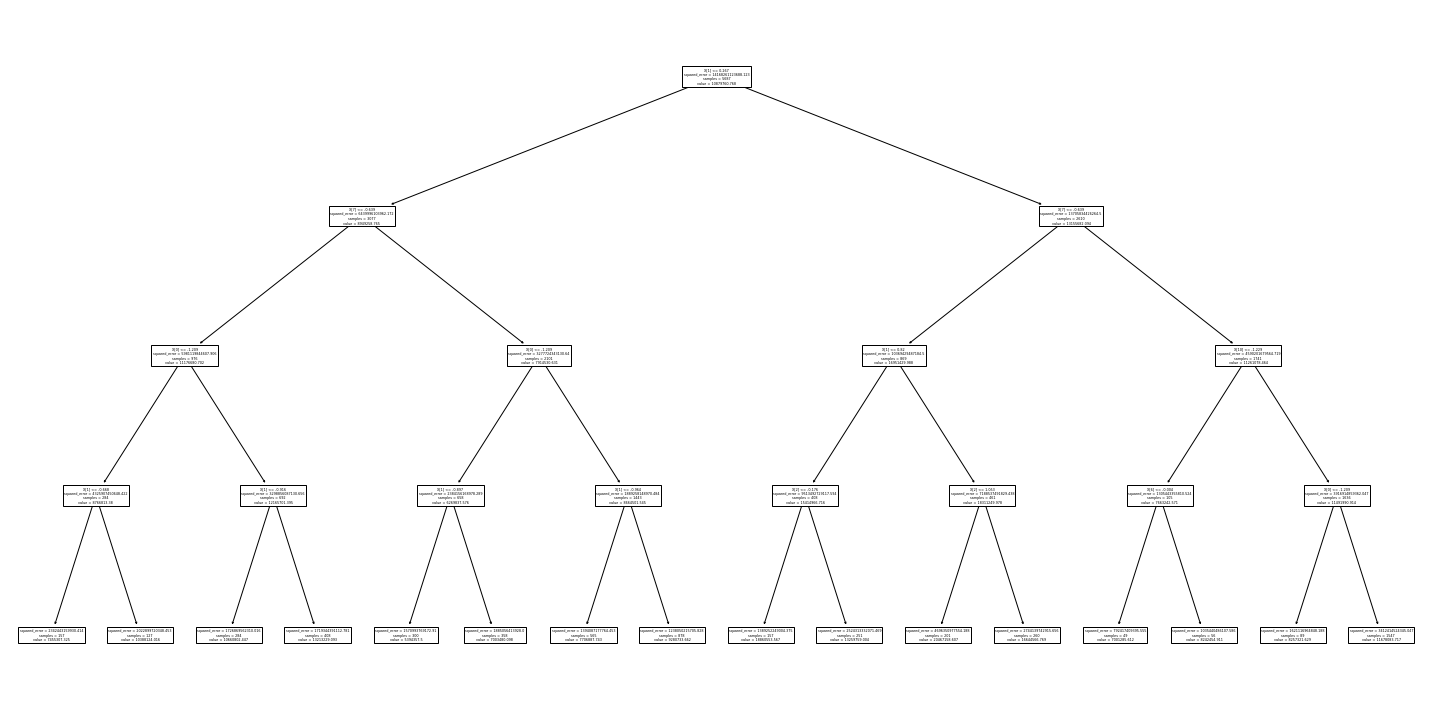

In [245]:
plt.figure(figsize=(20, 10))
tree.plot_tree(dt)
plt.tight_layout()


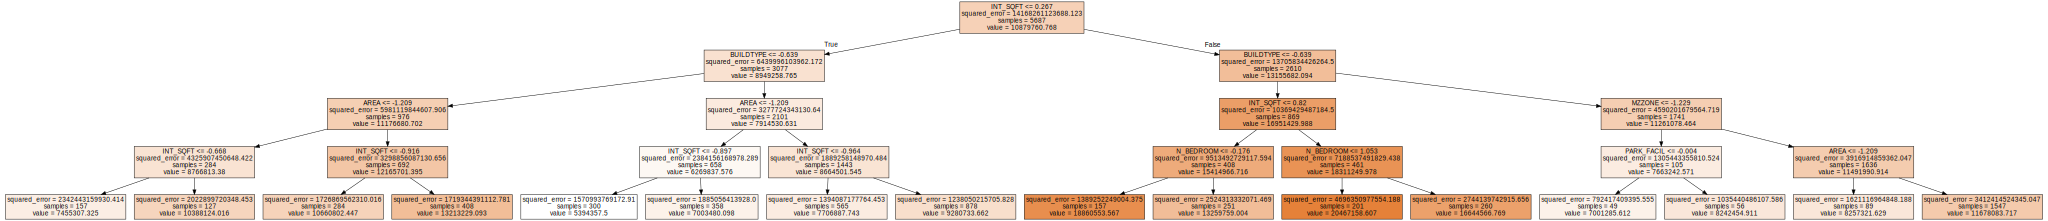

In [246]:
dot_data=tree.export_graphviz(dt,out_file=None, feature_names=
                              ['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND','PARK_FACIL', 
           'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE','BUILD_YEAR', 'AGE'],
           class_names=['SALES_PRICE'],filled=True)
graph=graphviz.Source(dot_data,format='png')
graph


In [247]:
y_test=Y_test
y_pred = dt.predict(X_test)
dt2_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dt2_df

,Actual,Predicted
0,15244800,1.325976e+07
1,8975540,9.280734e+06
2,12382360,1.167808e+07
3,8485200,7.706888e+06
4,7313720,8.242455e+06
...,...,...
1417,10722580,1.167808e+07
1418,11826060,1.167808e+07
1419,12477040,1.167808e+07
1420,9324040,9.280734e+06


In [248]:
#Evaluation Metric
print('DT r2_score 2:',metrics.r2_score(y_test,dt.predict(X_test)))

DT r2_score 2: 0.8180944492503517


[(0.08717579960484621, 'AREA'),
 (0.4397005528885633, 'INT_SQFT'),
 (0.06921259652167626, 'N_BEDROOM'),
 (0.0, 'N_BATHROOM'),
 (0.0, 'N_ROOM'),
 (0.0, 'SALE_COND'),
 (0.0005945869451686463, 'PARK_FACIL'),
 (0.38195426369556457, 'BUILDTYPE'),
 (0.0, 'UTILITY_AVAIL'),
 (0.0, 'STREET'),
 (0.021362200344181015, 'MZZONE'),
 (0.0, 'BUILD_YEAR'),
 (0.0, 'AGE')]

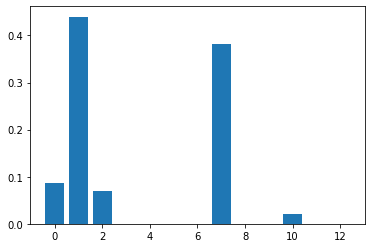

In [249]:
#Feature Importance
importance = dt.feature_importances_
plt.bar([x for x in range(len(importance))], importance)
list(zip(importance,['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND','PARK_FACIL', 
           'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE','BUILD_YEAR', 'AGE']))

# Random Forest

In [250]:
rf=RandomForestRegressor()
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [251]:
y_test=Y_test
y_pred=rf.predict(X_test)
rf_df=pd.DataFrame({'Actual ':y_test,'Predicted ':y_pred})
rf_df

,Actual,Predicted
0,15244800,15505429.30
1,8975540,8912319.60
2,12382360,12362569.00
3,8485200,8403523.45
4,7313720,7655852.45
...,...,...
1417,10722580,10834471.60
1418,11826060,12403791.70
1419,12477040,12472744.30
1420,9324040,9174294.00


In [252]:
#Evaluation Metric
print('r2_Score :', metrics.r2_score(y_test,y_pred))

r2_Score : 0.9835471790754822


In [253]:
#MAX_DEPTH
rf=RandomForestRegressor(n_estimators=100,max_depth=4)
rf.fit(X_train,Y_train)

RandomForestRegressor(max_depth=4)

In [254]:
y_test=Y_test
y_pred = rf.predict(X_test)
rf1_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf1_df

,Actual,Predicted
0,15244800,1.465253e+07
1,8975540,9.311371e+06
2,12382360,1.174561e+07
3,8485200,7.718048e+06
4,7313720,8.320928e+06
...,...,...
1417,10722580,1.174561e+07
1418,11826060,1.178819e+07
1419,12477040,1.183638e+07
1420,9324040,9.311371e+06


[(0.11222608633862012, 'AREA'),
 (0.4542870081450199, 'INT_SQFT'),
 (0.023712086885575523, 'N_BEDROOM'),
 (0.0040233220520570654, 'N_BATHROOM'),
 (0.002515915267517953, 'N_ROOM'),
 (0.0, 'SALE_COND'),
 (0.0002667730317217622, 'PARK_FACIL'),
 (0.383582097604514, 'BUILDTYPE'),
 (4.163080169709439e-06, 'UTILITY_AVAIL'),
 (0.00014359516334694418, 'STREET'),
 (0.019038217522195252, 'MZZONE'),
 (0.0002007349092616177, 'BUILD_YEAR'),
 (0.0, 'BUILDING_AGE')]

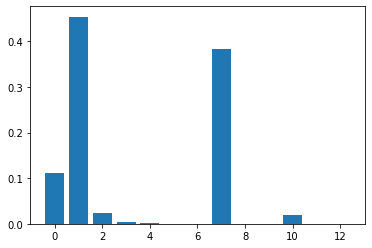

In [255]:
importance=rf.feature_importances_
plt.bar([x for x in range(len(importance))],importance)
list(zip(importance,['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'BUILD_YEAR', 'BUILDING_AGE']))

In [256]:
importances=list(rf.feature_importances_)
feature_importances=[(feature, round(importance,2))for feature, importance in zip(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'BUILD_YEAR', 'BUILDING_AGE'],importances)]
feature_importances=sorted(feature_importances,key=lambda x :x[1],reverse=True)
[print('Variable:{:20} Importance {}'.format(*pair)) for pair in feature_importances];

Variable:INT_SQFT             Importance 0.45
Variable:BUILDTYPE            Importance 0.38
Variable:AREA                 Importance 0.11
Variable:N_BEDROOM            Importance 0.02
Variable:MZZONE               Importance 0.02
Variable:N_BATHROOM           Importance 0.0
Variable:N_ROOM               Importance 0.0
Variable:SALE_COND            Importance 0.0
Variable:PARK_FACIL           Importance 0.0
Variable:UTILITY_AVAIL        Importance 0.0
Variable:STREET               Importance 0.0
Variable:BUILD_YEAR           Importance 0.0
Variable:BUILDING_AGE         Importance 0.0


In [257]:
#Evaluaton Metric
print('RF_r2_Score:', metrics.r2_score(y_test,rf.predict(X_test)))

RF_r2_Score: 0.8351851573235223


# **XGBOOST**

In [258]:
x_train=X_train
y_train=Y_train
x_test=X_test
y_test=Y_test

In [259]:
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model=xgb.XGBRegressor(learning_rate=lr,n_estimators=100,verbosity=0)
  model.fit(x_train,y_train)
  model.score(x_test,y_test)
  print('Learning Rate :', lr,'Train Score :',model.score(x_test,y_test),'cross_val_score :',np.mean(cross_val_score(model, x_train, y_train, cv=10)))


Learning Rate : 0.01 Train Score : -0.46997136643304027 cross_val_score : -0.44996718968994626
Learning Rate : 0.02 Train Score : 0.6876605252527238 cross_val_score : 0.6974502562528759
Learning Rate : 0.03 Train Score : 0.8856790399329721 cross_val_score : 0.8914902371796618
Learning Rate : 0.04 Train Score : 0.9357981540508772 cross_val_score : 0.9382552404578341
Learning Rate : 0.05 Train Score : 0.9557088116000435 cross_val_score : 0.9563821422653328
Learning Rate : 0.06 Train Score : 0.9671295892672485 cross_val_score : 0.9678835718430401
Learning Rate : 0.07 Train Score : 0.9739934203112816 cross_val_score : 0.974926782098777
Learning Rate : 0.08 Train Score : 0.9798963091570865 cross_val_score : 0.9799082131345352
Learning Rate : 0.09 Train Score : 0.9819875811881079 cross_val_score : 0.9827751656566244
Learning Rate : 0.1 Train Score : 0.9852138283235717 cross_val_score : 0.9857571672555169
Learning Rate : 0.11 Train Score : 0.9873215365238854 cross_val_score : 0.98781214751106

In [260]:
import xgboost as xgb
xgb = xgb.XGBRegressor(learning_rate = 0.7, n_estimators=100)
xgb.fit(x_train,y_train)

[04:39:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.7)

In [261]:
y_test=Y_test
y_pred = xgb.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,15244800,15325224.0
1,8975540,9044564.0
2,12382360,12519868.0
3,8485200,8556110.0
4,7313720,7683199.5
...,...,...
1417,10722580,10692484.0
1418,11826060,11760990.0
1419,12477040,12451690.0
1420,9324040,9430474.0


In [262]:
# Evaluation Metric
print('r2_score',metrics.r2_score(xgb.predict(X_test),y_test))

r2_score 0.995901437772477


# Best Model for Predicting House Price

In [266]:
print('r2_Score-XGBOOST',metrics.r2_score(y_test,xgb.predict(X_test)))
print('r2_Score-KNN',metrics.r2_score(y_test,knn.predict(X_test)))
print('r2_Score-Decision Tree',metrics.r2_score(y_test,dt.predict(X_test)))
print('r2_Score-Random Forest',metrics.r2_score(y_test,rf.predict(X_test)))
#print('r2_Score-Liner Regression', metrics.r2_score(y_test,lr.predict(X_test)))

r2_Score-XGBOOST 0.9959048368934299
r2_Score-KNN 0.8750697359487104
r2_Score-Decision Tree 0.8180944492503517
r2_Score-Random Forest 0.8351851573235223


In [ ]:
# from above investigation XGBOOST model is Best for predicting the house price prediction

In [267]:
mmm_df

Minimum       Average      Median   Maximum  \
BUILDTYPE  AREA                                                       
Commercial Adyar        6036800  1.151977e+07  11238050.0  17360470   
           Anna Nagar  15754040  1.994195e+07  20023775.0  23407860   
           Chrompet     8071050  1.238855e+07  12456450.0  16026600   
           KK Nagar    11286720  1.596759e+07  16197310.0  20246360   
           Karapakkam   3120000  9.166997e+06   9345250.0  14486250   
           T Nagar     16300260  2.011892e+07  20380405.0  23667340   
           Velachery   10391900  1.426175e+07  14239220.0  18298710   
House      Adyar        3869180  7.973683e+06   7960405.0  11409485   
           Anna Nagar   9593040  1.240600e+07  12354835.0  15237150   
           Chrompet     5340900  8.553965e+06   8548150.0  11845200   
           KK Nagar     7410200  1.066675e+07  10651630.0  14276060   
           Karapakkam   2640250  6.266440e+06   6285500.0   9966750   
           T Nagar      9433610  1.266454e+07  12683140.0  15880930   
           Velachery    5574400  9.036630e+06   8998725.0  12247960   
Others     Adyar        4456285  8.209260e+06   8181057.5  11818860   
           Anna Nagar  10245090  1.347352e+07  13396430.0  16859010   
           Chrompet     5925790  9.154363e+06   9171700.0  12851040   
           KK Nagar     7826780  1.163470e+07  11633740.0  14521700   
           Karapakkam   2156875  6.737757e+06   6678875.0  11117625   
           T Nagar     10573780  1.357577e+07  13765430.0  16766120   
           Velachery    6074780  9.726395e+06   9682115.0  12669880   

                        BUILDTYPE        AREA  
BUILDTYPE  AREA                                
Commercial Adyar       Commercial       Adyar  
           Anna Nagar  Commercial  Anna Nagar  
           Chrompet    Commercial    Chrompet  
           KK Nagar    Commercial    KK Nagar  
           Karapakkam  Commercial   Karapakam  
           T Nagar     Commercial     T Nagar  
           Velachery   Commercial   Velachery  
House      Adyar            House       Adyar  
           Anna Nagar       House  Anna Nagar  
           Chrompet         House    Chrompet  
           KK Nagar         House    KK Nagar  
           Karapakkam       House   Karapakam  
           T Nagar          House     T Nagar  
           Velachery        House   Velachery  
Others     Adyar           Others       Adyar  
           Anna Nagar      Others  Anna Nagar  
           Chrompet        Others    Chrompet  
           KK Nagar        Others    KK Nagar  
           Karapakkam      Others   Karapakam  
           T Nagar         Others     T Nagar  
           Velachery       Others   Velachery

Important Featutes in House Price Pridiction


INT_SQFT
BUILDTYPE           
AREA                 
N_BEDROOM            
MZZONE               
N_BATHROOM




From above ETA mm_df, when compare to all the locations karapakkam minimum price is 26,40,250.00,
maximim price is 62,66,439.00 and average house price is 99,66,750.00.

The negotiable price rage is90,00,000 - 95,00,000. 

For real estate people, since commercial building type is more in Tnagar and Anna Nagar.So it will be a best choice for them to get more profit. 

              -------------------------------------------End-----------------------------------